Generated samples shape: (500, 100, 2)


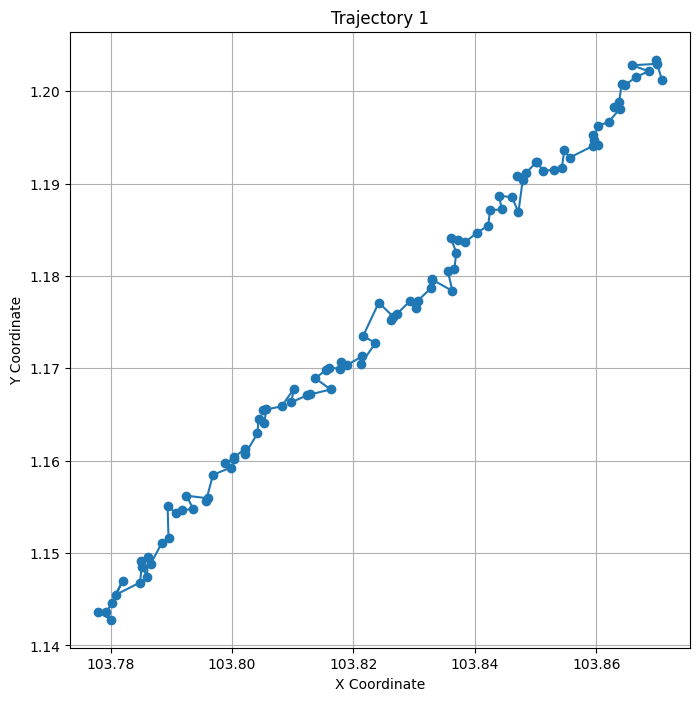

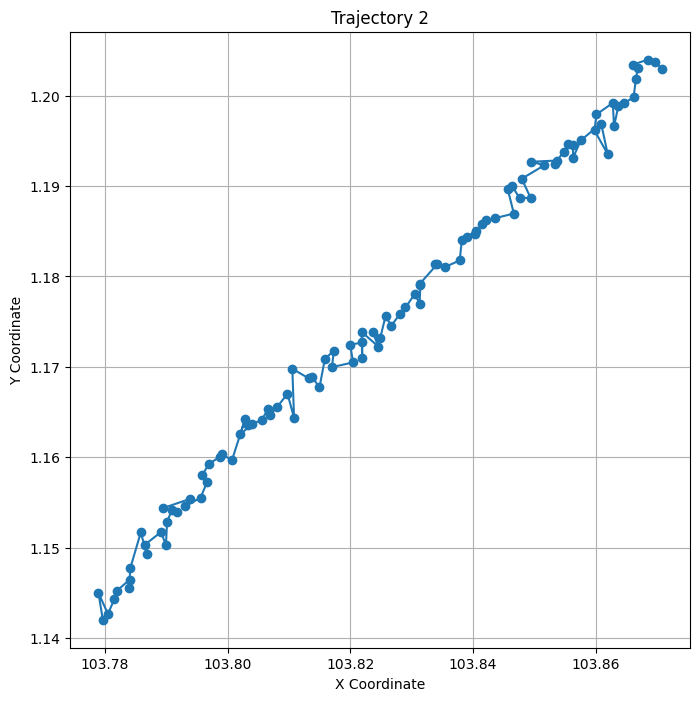

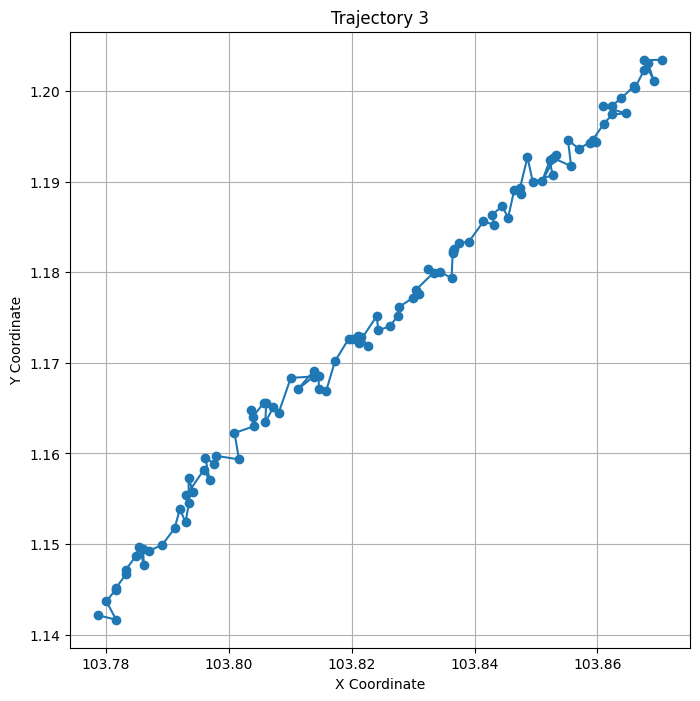

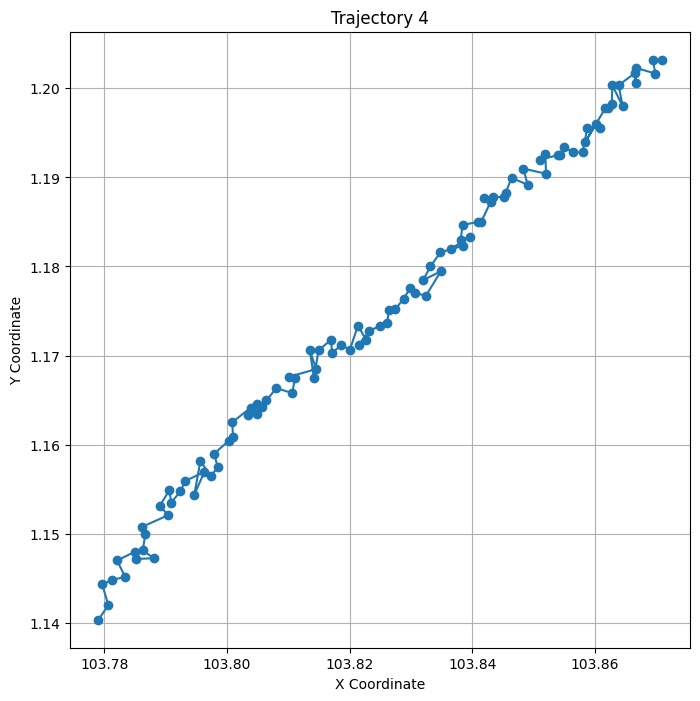

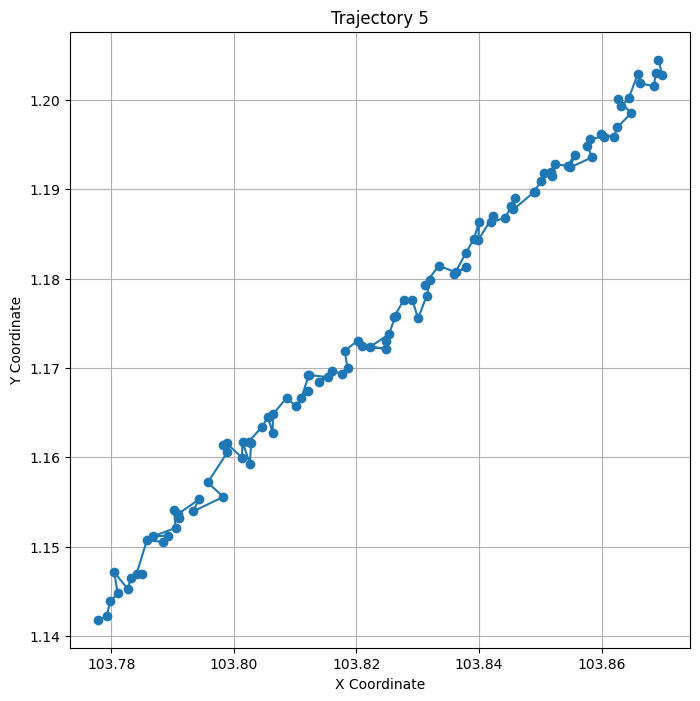

In [1]:
import numpy as np
import matplotlib.pyplot as plt

generated_samples = np.load('/home/junze/.jupyter/Train_VAE_full/dataset_2.csv.npy')

print(f"Generated samples shape: {generated_samples.shape}")

def plot_2d_trajectories(data, num_trajectories):
    for i in range(num_trajectories):
        plt.figure(figsize=(8, 8))
        plt.plot(data[i, :, 0], data[i, :, 1], marker='o')
        plt.title(f'Trajectory {i+1}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)

plot_2d_trajectories(generated_samples, num_trajectories=5)

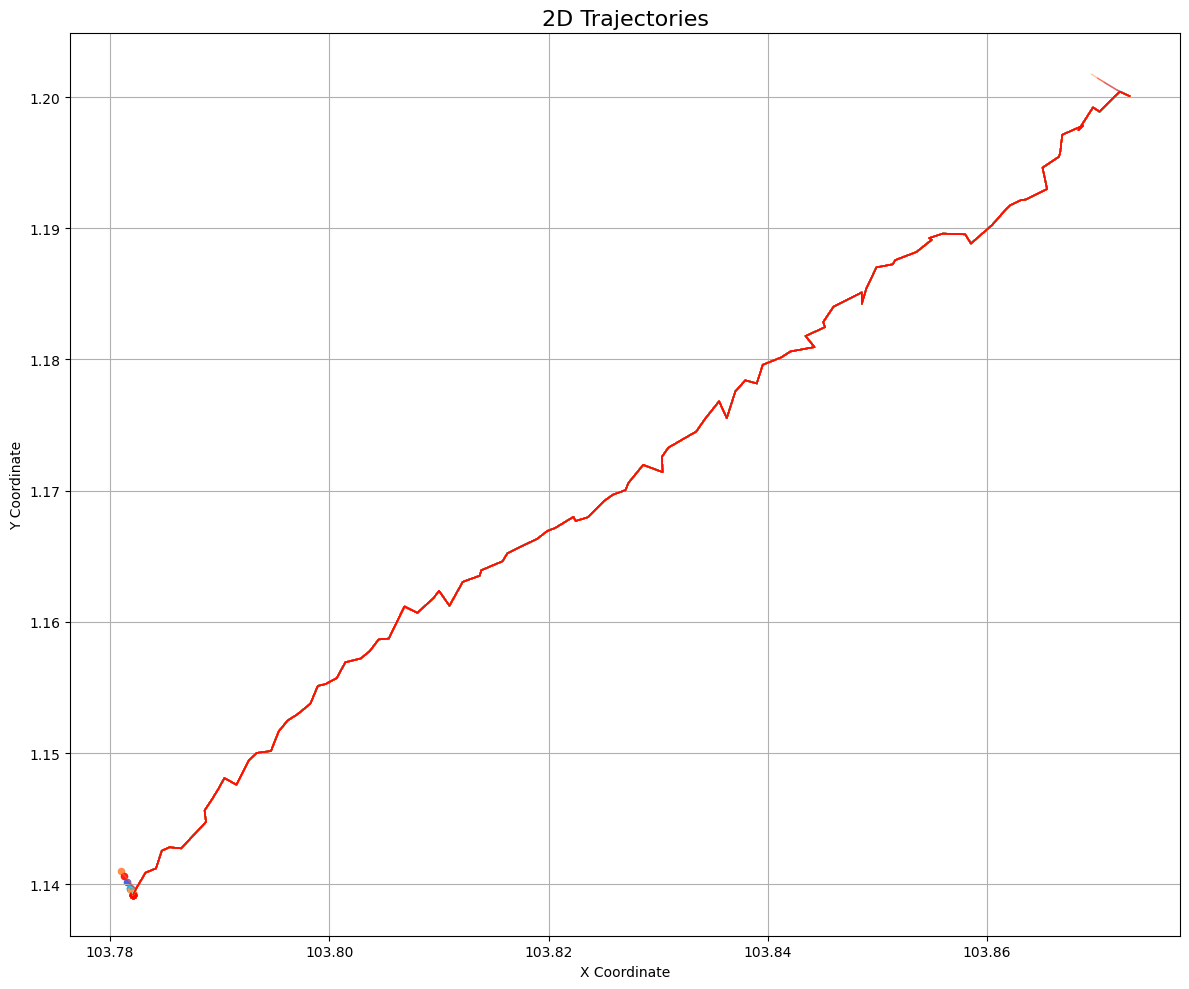

In [2]:
def visualize_2d_trajectories(data, title="2D Trajectories", save_path=None):
    """
    Visualize multiple 2D trajectories with different colors.
    
    Parameters:
    data (numpy.ndarray): Array of shape (n_samples, time_steps, 2)
    title (str): Title of the plot
    save_path (str): If provided, saves the plot to this path
    """
    n_samples, time_steps, n_coords = data.shape
    assert n_coords == 2, "Data should have exactly 2 coordinates (x and y)"
    
    cmap = plt.cm.rainbow
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    for i in range(n_samples):
        color = cmap(i / n_samples)
        ax.plot(data[i, :, 0], data[i, :, 1], color=color, alpha=0.5, linewidth=1)
        ax.scatter(data[i, 0, 0], data[i, 0, 1], color=color, s=20, marker='o')
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.grid(True)
    
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

sample = np.load("/home/junze/.jupyter/Train_VAE_full/datatrained_{n}x.npy")
visualize_2d_trajectories(sample, save_path="/home/junze/.jupyter/Train_VAE_full")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

generated_samples = np.load('generated_sample_denorm.npy')

def save_trajectory_animation(data, trajectory_index=0, filename='trajectory_animation.mp4'):
    """
    Save an animated 2D trajectory from the generated data.
    
    :param data: The generated data, expected to be 3D (num_samples, seq_len, 2).
    :param trajectory_index: Index of the trajectory to animate.
    :param filename: Filename to save the animation (e.g., 'trajectory_animation.mp4').
    """
    trajectory = data[trajectory_index]  
    seq_len = trajectory.shape[0]
    
    fig, ax = plt.subplots()
    line, = ax.plot([], [], 'bo-', lw=2)  
    ax.set_xlim(np.min(trajectory[:, 0]) - 0.1, np.max(trajectory[:, 0]) + 0.1)
    ax.set_ylim(np.min(trajectory[:, 1]) - 0.1, np.max(trajectory[:, 1]) + 0.1)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(f'Trajectory {trajectory_index + 1} Movement')

    def init():
        """Initialize the background of the plot."""
        line.set_data([], [])
        return line,

    def update(frame):
        """Update the line to show movement up to the current frame."""
        line.set_data(trajectory[:frame, 0], trajectory[:frame, 1])
        return line,

    ani = animation.FuncAnimation(fig, update, frames=seq_len, init_func=init, blit=True, interval=200)
    

    ani.save(filename, writer='ffmpeg', fps=5)
    plt.close(fig)  

save_trajectory_animation(generated_samples, trajectory_index=0, filename='trajectory_animation.mp4')
